In [1]:
import glob, pickle
import numpy as np
import matplotlib.pyplot as plt

from biopandas.pdb import PandasPdb
from sklearn.decomposition import PCA
from colav.extract_data import *

In [2]:
# extract the feature information
resnum_bounds = (7, 279)
theseus_strucs = sorted(glob.glob("../results/ptp1b_data/ptp1b_theseus_data/*pdb"))
sa_data_matrix, sa_strucs = generate_strain_matrix(
    structure_list=theseus_strucs,
    reference_pdb="../results/ptp1b_data/ptp1b_theseus_data/theseus_1nwl_chainA.pdb",
    data_type="sheart",
    resnum_bounds=resnum_bounds,
    save=False,
    save_additional=True,  # must be True to generate `atom_set.pkl` for later plotting
    verbose=False,
)

Calculating strain against reference ../results/ptp1b_data/ptp1b_theseus_data/theseus_1nwl_chainA.pdb...


In [3]:
# perform PCA
pca = PCA(n_components=10)
transform = pca.fit_transform(sa_data_matrix)
pca.explained_variance_ratio_

array([0.5872113 , 0.08446396, 0.04683596, 0.03575712, 0.02329181,
       0.01561163, 0.01453673, 0.0119047 , 0.0108131 , 0.00854226])

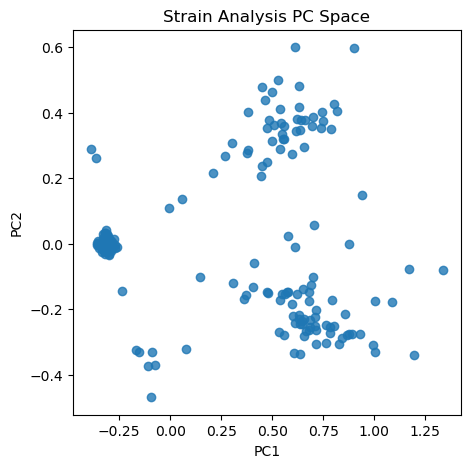

In [4]:
# plot the resulting PC space, with structures represted by markers
fig, ax = plt.subplots(figsize=(5, 5))

ax.scatter(transform[:, 0], transform[:, 1], marker="o", alpha=0.8)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("Strain Analysis PC Space")

plt.show()

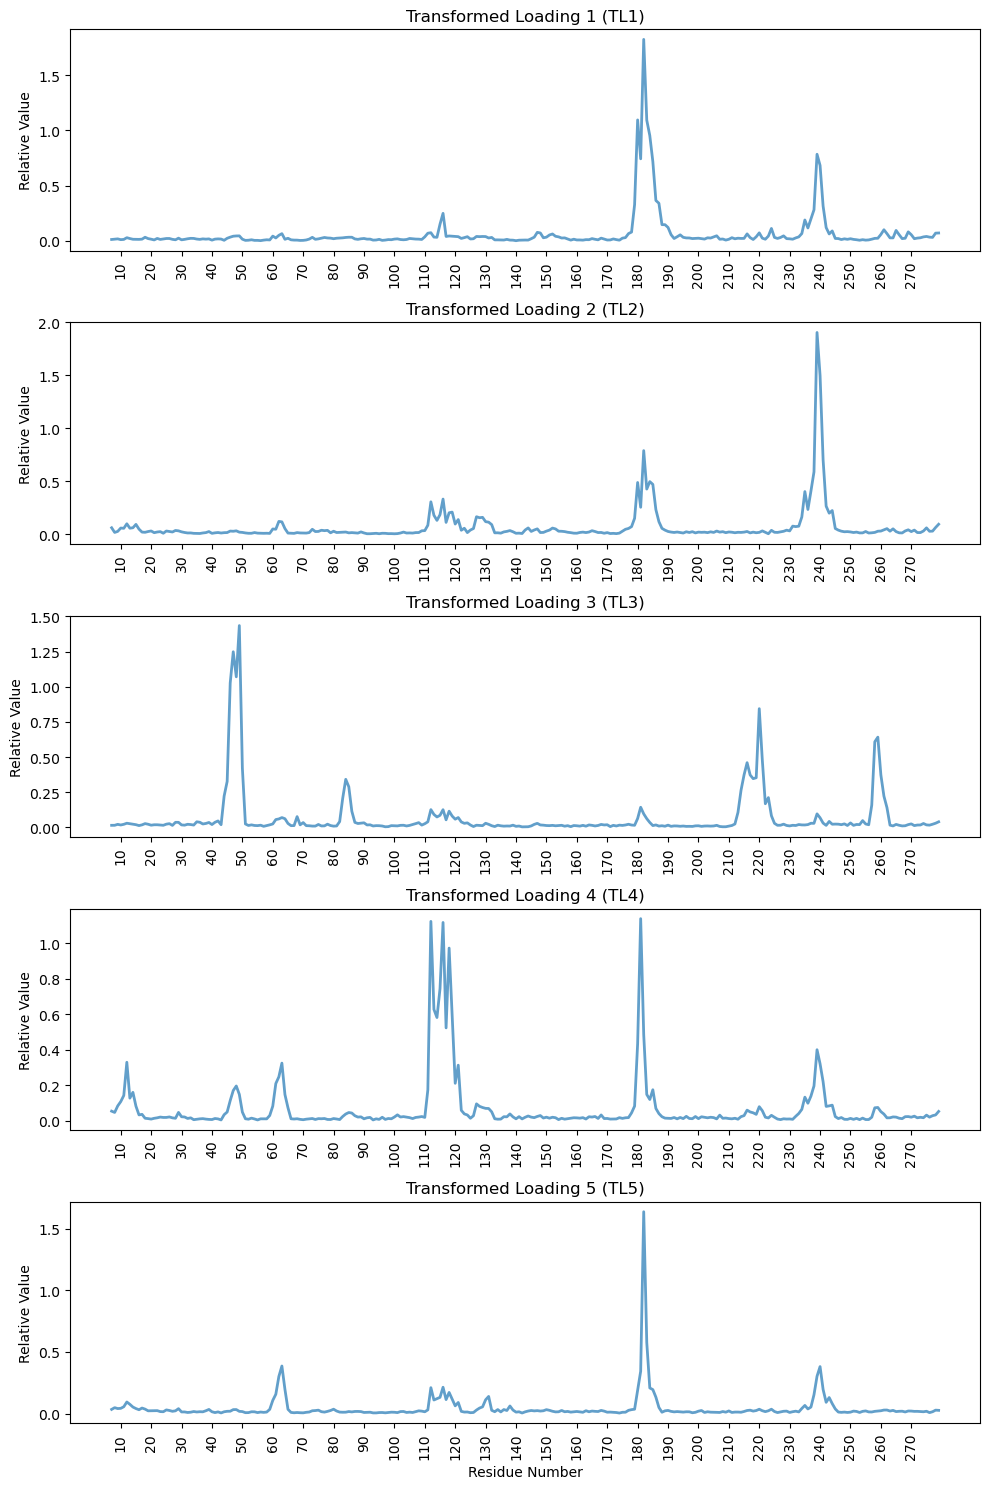

In [5]:
# plot the transformed loadings (accounting for sin and cos)
fig, ax = plt.subplots(5, 1, figsize=(10, 15))
ax = ax.flatten()
shared_atom_set = pickle.load(open("atom_set.pkl", "rb"))

for i in np.arange(5):
    ax[i].plot(
        np.arange(resnum_bounds[0], resnum_bounds[1] + 1),
        calculate_sa_tl(pca.components_[i], sorted(shared_atom_set)),
        "-",
        linewidth=2,
        alpha=0.7,
    )

    ax[i].set_title(f"Transformed Loading {i+1} (TL{i+1})")
    ax[i].set_xticks(
        [x for x in np.arange(resnum_bounds[0], resnum_bounds[1] + 1) if x % 10 == 0],
        labels=[
            x for x in np.arange(resnum_bounds[0], resnum_bounds[1] + 1) if x % 10 == 0
        ],
        rotation="vertical",
    )
    ax[i].set_ylabel("Relative Value")
ax[-1].set_xlabel("Residue Number")
plt.tight_layout()
plt.show()